In [75]:
#Importing the Library Files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
HDPP = pd.read_csv(r"C:\Users\Vicky Yewle\Downloads\Machine Learning\Supervised Learning\3 Decision Tree\Heart Disease Prediction\Dataset\HeartDisease.csv")
HDPP.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
HDPP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [78]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [79]:
# Putting feature variable to X
X = HDPP.drop('target',axis=1)

# Putting response variable to y
y = HDPP['target']

In [80]:
#splitting of Data

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state = 100)
X_train.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2


In [81]:
y_test.shape

(61,)

In [82]:
# Import Decision Tree Classifier From Decision-Tree
from sklearn.tree import DecisionTreeClassifier

#Fitting the Decision Tree with Default Hyperparameters apart from max depth
# X_train and y_train are fitted into default decision tree
dt_default = DecisionTreeClassifier(max_depth=6)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [83]:
y_train.shape

(242,)

In [84]:
X_test.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3


In [85]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions 
#test an
y_pred_default = dt_default.predict(X_test)

print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        33
           1       0.71      0.89      0.79        28

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.81      0.79      0.79        61



In [86]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[23 10]
 [ 3 25]]
0.7868852459016393


In [87]:
# As we have got accuracy score 0.770 whcih is verry less we will do iterative action 

[Text(177.54545454545456, 201.90857142857143, 'X[12] <= 2.5\ngini = 0.491\nsamples = 242\nvalue = [105, 137]'),
 Text(91.30909090909091, 170.84571428571428, 'X[11] <= 0.5\ngini = 0.365\nsamples = 150\nvalue = [36, 114]'),
 Text(50.727272727272734, 139.78285714285715, 'X[9] <= 2.7\ngini = 0.213\nsamples = 99\nvalue = [12, 87]'),
 Text(30.436363636363637, 108.72, 'X[7] <= 83.5\ngini = 0.172\nsamples = 95\nvalue = [9, 86]'),
 Text(20.290909090909093, 77.65714285714284, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(40.581818181818186, 77.65714285714284, 'X[4] <= 272.0\ngini = 0.156\nsamples = 94\nvalue = [8, 86]'),
 Text(20.290909090909093, 46.59428571428572, 'X[8] <= 0.5\ngini = 0.079\nsamples = 73\nvalue = [3, 70]'),
 Text(10.145454545454546, 15.531428571428563, 'gini = 0.032\nsamples = 61\nvalue = [1, 60]'),
 Text(30.436363636363637, 15.531428571428563, 'gini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(60.872727272727275, 46.59428571428572, 'X[7] <= 132.0\ngini = 0.363\nsamples 

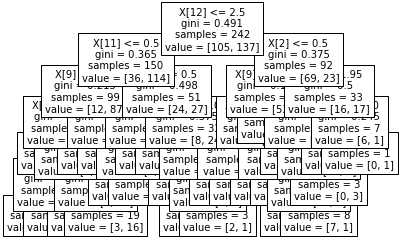

In [88]:
from sklearn import tree
tree.plot_tree(dt_default,fontsize=10)

In [89]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 6

# parameters to build the model on
parameters = {'max_depth': range(1,40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, 
                    parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [90]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.005598,0.003998,0.003021,0.004315,1,{'max_depth': 1},0.756098,0.658537,0.825,0.675,...,0.067293,38,0.756219,0.776119,0.742574,0.772277,0.742574,0.747525,0.756215,0.013551
1,0.010615,0.007518,0.002605,0.005824,2,{'max_depth': 2},0.756098,0.634146,0.675,0.675,...,0.048853,39,0.756219,0.805970,0.762376,0.772277,0.797030,0.772277,0.777692,0.017925
2,0.007816,0.007816,0.002606,0.005828,3,{'max_depth': 3},0.804878,0.658537,0.825,0.775,...,0.062151,35,0.850746,0.860697,0.846535,0.846535,0.836634,0.831683,0.845471,0.009400
3,0.006147,0.005671,0.004446,0.005756,4,{'max_depth': 4},0.829268,0.731707,0.800,0.675,...,0.051658,37,0.890547,0.875622,0.891089,0.900990,0.856436,0.896040,0.885121,0.014995
4,0.000000,0.000000,0.007038,0.007157,5,{'max_depth': 5},0.804878,0.731707,0.750,0.725,...,0.044944,36,0.925373,0.915423,0.925743,0.950495,0.891089,0.945545,0.925611,0.019631


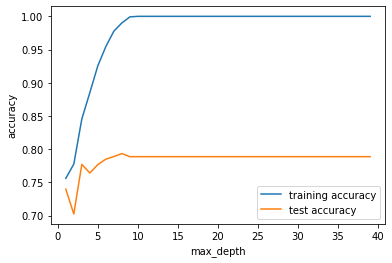

In [91]:
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()
         

In [92]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 6

# parameters to build the model on
parameters = {'min_samples_leaf': range(2,50,10)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, 
                    parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(2, 50, 10)},
             return_train_score=True, scoring='accuracy')

In [93]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.008401,0.000772,0.000169,0.000378,2,{'min_samples_leaf': 2},0.878049,0.804878,0.800,0.675,...,0.068289,1,0.970149,0.960199,0.975248,0.965347,0.945545,0.960396,0.962814,0.009361
1,0.004002,0.004002,0.005310,0.003757,12,{'min_samples_leaf': 12},0.780488,0.756098,0.825,0.725,...,0.042754,2,0.845771,0.860697,0.831683,0.856436,0.816832,0.836634,0.841342,0.014935
2,0.003232,0.006786,0.000341,0.000762,22,{'min_samples_leaf': 22},0.731707,0.658537,0.675,0.675,...,0.060479,5,0.796020,0.776119,0.762376,0.772277,0.797030,0.772277,0.779350,0.012839
3,0.007818,0.007818,0.002606,0.005827,32,{'min_samples_leaf': 32},0.756098,0.658537,0.700,0.675,...,0.058804,4,0.756219,0.776119,0.752475,0.772277,0.742574,0.772277,0.761990,0.012330
4,0.006752,0.003022,0.005271,0.005853,42,{'min_samples_leaf': 42},0.756098,0.658537,0.825,0.675,...,0.065660,3,0.756219,0.776119,0.742574,0.772277,0.742574,0.772277,0.760340,0.014037


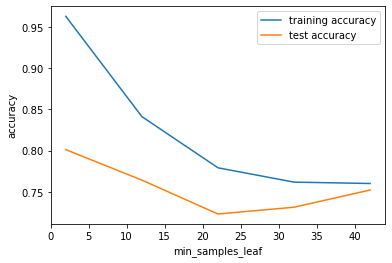

In [94]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.legend()
plt.show()
         

In [95]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 6

# parameters to build the model on
parameters = {'min_samples_split': range(5, 30, 5)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 30, 5)},
             return_train_score=True, scoring='accuracy')

In [96]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.008256,0.000563,0.001333,0.002980,5,{'min_samples_split': 5},0.853659,0.804878,0.750,0.725,...,0.052664,1,0.960199,0.950249,0.965347,0.970297,0.970297,0.970297,0.964448,0.007338
1,0.005867,0.007045,0.005210,0.007368,10,{'min_samples_split': 10},0.829268,0.804878,0.750,0.725,...,0.035103,2,0.950249,0.920398,0.935644,0.905941,0.925743,0.910891,0.924811,0.014914
2,0.010421,0.007368,0.002605,0.005825,15,{'min_samples_split': 15},0.853659,0.707317,0.775,0.675,...,0.057803,5,0.920398,0.885572,0.900990,0.896040,0.896040,0.886139,0.897530,0.011634
3,0.009332,0.002980,0.002669,0.003774,20,{'min_samples_split': 20},0.829268,0.682927,0.800,0.675,...,0.059409,4,0.865672,0.880597,0.851485,0.876238,0.831683,0.861386,0.861177,0.016269
4,0.008002,0.000003,0.004061,0.004063,25,{'min_samples_split': 25},0.804878,0.682927,0.825,0.725,...,0.049959,3,0.855721,0.880597,0.851485,0.866337,0.831683,0.856436,0.857043,0.014817


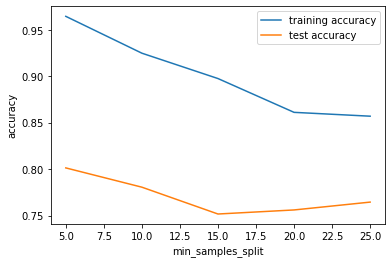

In [97]:
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [98]:
### create a final model

param_grid= {
    'max_depth': range(1,8,2),
    'min_samples_leaf': range(2,50,10),
    'min_samples_split': range(5,30,5),
    'criterion' :["entropy","gini"]
}
n_folds = 6

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree,
                param_grid= param_grid,
                cv = n_folds,
                verbose=1,
                n_jobs=-1
)
grid_search.fit(X_train, y_train)

Fitting 6 folds for each of 200 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   12.9s finished


GridSearchCV(cv=6, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 8, 2),
                         'min_samples_leaf': range(2, 50, 10),
                         'min_samples_split': range(5, 30, 5)},
             verbose=1)

In [99]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014439,0.002882,0.012327,0.007830,entropy,1,2,5,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.756098,0.658537,0.825,0.675,0.825,0.700,0.739939,0.067293,84
1,0.018800,0.005927,0.012252,0.006137,entropy,1,2,10,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.756098,0.658537,0.825,0.675,0.825,0.700,0.739939,0.067293,84
2,0.016554,0.005204,0.012095,0.004094,entropy,1,2,15,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.756098,0.658537,0.825,0.675,0.825,0.700,0.739939,0.067293,84
3,0.011097,0.005742,0.010146,0.005695,entropy,1,2,20,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.756098,0.658537,0.825,0.675,0.825,0.700,0.739939,0.067293,84
4,0.013657,0.002789,0.013026,0.005825,entropy,1,2,25,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.756098,0.658537,0.825,0.675,0.825,0.700,0.739939,0.067293,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.008003,0.000008,0.008007,0.000004,gini,7,42,5,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.756098,0.658537,0.825,0.675,0.825,0.775,0.752439,0.065660,43
196,0.017547,0.011195,0.006643,0.003069,gini,7,42,10,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.756098,0.658537,0.825,0.675,0.825,0.775,0.752439,0.065660,43
197,0.011179,0.004167,0.009830,0.003119,gini,7,42,15,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.756098,0.658537,0.825,0.675,0.825,0.775,0.752439,0.065660,43
198,0.010561,0.005765,0.010422,0.007369,gini,7,42,20,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.756098,0.658537,0.825,0.675,0.825,0.775,0.752439,0.065660,43


In [100]:
print("best accuracy",grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7932926829268293
DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)


In [101]:
clf_gini = DecisionTreeClassifier(criterion = "entropy",
                                 max_depth = 5,
                                 min_samples_leaf=2,
                                 min_samples_split = 5,
                                 random_state = 100
                                 )
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5, random_state=100)

In [102]:
clf_gini.score(X_test,y_test)

0.819672131147541

In [103]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred= clf_gini.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81        33
           1       0.73      0.96      0.83        28

    accuracy                           0.82        61
   macro avg       0.84      0.83      0.82        61
weighted avg       0.85      0.82      0.82        61



In [104]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[23 10]
 [ 1 27]]
0.819672131147541


In [105]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[23 10]
 [ 3 25]]
0.7868852459016393


In [106]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)